In [61]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import Point
from shapely.geometry import shape

from datetime import datetime, timedelta

In [62]:
df = pd.read_csv('../data/202206-citbike-tripdata.csv')

In [63]:
df_07 = pd.read_csv('../data/202207-citbike-tripdata.csv')

# Pick the station that still existing today
## also no Jersey 

In [64]:
url = 'https://gbfs.citibikenyc.com/gbfs/en/station_information.json'
r = requests.get(url)
data = r.json()
station_info_df = pd.DataFrame(data['data']['stations'])

In [65]:
station_info_df

,external_id,has_kiosk,rental_methods,station_type,short_name,eightd_station_services,capacity,lon,legacy_id,rental_uris,name,station_id,region_id,electric_bike_surcharge_waiver,eightd_has_key_dispenser,lat
0,66db237e-0aca-11e7-82f6-3863bb44ef7c,True,"[KEY, CREDITCARD]",classic,6926.01,[],54,-73.993929,72,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",W 52 St & 11 Ave,72,71,False,False,40.767272
1,66db269c-0aca-11e7-82f6-3863bb44ef7c,True,"[KEY, CREDITCARD]",classic,5430.08,[],33,-74.006667,79,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Franklin St & W Broadway,79,71,False,False,40.719116
2,66db277a-0aca-11e7-82f6-3863bb44ef7c,True,"[KEY, CREDITCARD]",classic,5167.06,[],27,-74.000165,82,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",St James Pl & Pearl St,82,71,False,False,40.711174
3,66db281e-0aca-11e7-82f6-3863bb44ef7c,True,"[KEY, CREDITCARD]",classic,4354.07,[],62,-73.976323,83,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Atlantic Ave & Fort Greene Pl,83,71,False,False,40.683826
4,66db28b5-0aca-11e7-82f6-3863bb44ef7c,True,"[KEY, CREDITCARD]",classic,6148.02,[],74,-74.001497,116,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",W 17 St & 8 Ave,116,71,False,False,40.741776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,9b70cbe2-25fc-42f8-b6e6-ac21ef248e4b,False,"[KEY, CREDITCARD]",classic,4131.03,[],0,-73.944370,5006,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Brooklyn Ave & Dean St,5006,71,False,False,40.676690
1794,e92414a8-e72f-4a69-a5a1-7f50f4c881e5,True,"[KEY, CREDITCARD]",classic,3428.04,[],19,-74.012865,5008,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",2 Ave & 43 St,5008,71,False,False,40.652928
1795,994a0301-b45e-4928-84a1-5a97c625fdbf,True,"[KEY, CREDITCARD]",classic,7113.05,[],47,-73.945488,5010,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",E 85 St & East End Ave,5010,71,False,False,40.774318
1796,44a80c48-c1a9-4ff1-92eb-6bf8be492f5e,False,"[KEY, CREDITCARD]",classic,3950.03,[],0,-73.914330,5012,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Park Pl & Thomas S. Boyland St,5012,71,False,False,40.671540


In [66]:
gdf_station= gpd.GeoDataFrame(
    station_info_df, geometry=gpd.points_from_xy(station_info_df.lon, station_info_df.lat), crs=4326).to_crs(2263)

In [67]:
nyc_boro = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_boronyc_boro = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_boro

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [68]:
nyc_boro.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

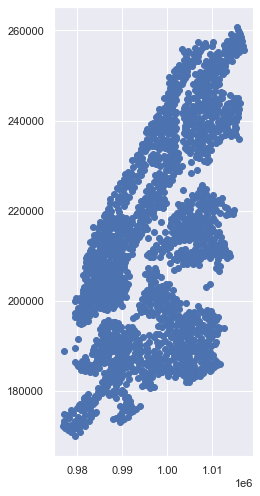

In [70]:
gdf_station_clip = gpd.clip(gdf_station,nyc_boro) 
gdf_station_clip.plot()

In [71]:
gdf_station_clip

,external_id,has_kiosk,rental_methods,station_type,short_name,eightd_station_services,capacity,lon,legacy_id,rental_uris,name,station_id,region_id,electric_bike_surcharge_waiver,eightd_has_key_dispenser,lat,geometry
1715,038b7369-9c6e-4eb2-8569-f7461443302f,False,"[KEY, CREDITCARD]",classic,4120.02,[],0,-73.900800,4912,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Fulton St & Williams Ave,4912,71,False,False,40.677090,POINT (1011765.705 185974.137)
857,24f431ca-c2a5-46be-966b-b8d4c3e4b346,True,"[KEY, CREDITCARD]",classic,4798.10,[],15,-73.900700,3875,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Stephen St & Seneca Ave,3875,71,False,False,40.698800,POINT (1011784.476 193883.750)
858,9d23b0e9-a478-407c-a0e0-0aff1b0398fc,True,"[KEY, CREDITCARD]",classic,4798.02,[],23,-73.897950,3876,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Forest Ave & Summerfield St,3876,71,False,False,40.699220,POINT (1012546.833 194037.645)
1677,4cd5a87d-7618-4a15-892d-8cf29eec865c,False,"[KEY, CREDITCARD]",classic,5881.01,[],0,-73.901280,4827,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Tyler Ave & Maurice Ave,4827,71,False,False,40.733940,POINT (1011609.222 206686.135)
1675,84b8a9f3-894b-47d2-ba50-c1a9ed20234d,False,"[KEY, CREDITCARD]",classic,5956.02,[],0,-73.900790,4824,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",50 Ave & 65 St,4824,71,False,False,40.736990,POINT (1011743.762 207797.498)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,32cc1603-a4b5-4099-b7bf-681de451b04a,True,"[KEY, CREDITCARD]",classic,5351.07,[],47,-73.999573,4737,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Walker St & Baxter St,4737,71,False,False,40.717411,POINT (984368.368 200648.692)
160,66dc0e99-0aca-11e7-82f6-3863bb44ef7c,True,"[KEY, CREDITCARD]",classic,5329.03,[],81,-74.013221,426,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",West St & Chambers St,426,71,False,False,40.717548,POINT (980585.121 200699.005)
82,66db7a0d-0aca-11e7-82f6-3863bb44ef7c,True,"[KEY, CREDITCARD]",classic,5359.11,[],54,-74.005549,320,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",Leonard St & Church St,320,71,False,False,40.717571,POINT (982711.774 200707.033)
1589,a6492ad5-d13e-48b0-a0d5-08e60ad93e53,True,"[KEY, CREDITCARD]",classic,5368.03,[],47,-74.015880,4733,"{'ios': 'https://bkn.lft.to/lastmile_qr_scan',...",River Ter & Warren St,4733,71,False,False,40.717599,POINT (979848.045 200717.566)


In [72]:
gdf_station_clip[['station_id','capacity','name','geometry']].to_file('../output/citibike station.shp')  

In [73]:
existing = gdf_station_clip['name']
existing = pd.DataFrame(existing)
existing

,name
1715,Fulton St & Williams Ave
857,Stephen St & Seneca Ave
858,Forest Ave & Summerfield St
1677,Tyler Ave & Maurice Ave
1675,50 Ave & 65 St
...,...
1593,Walker St & Baxter St
160,West St & Chambers St
82,Leonard St & Church St
1589,River Ter & Warren St


# create trip count by start-end station

In [74]:
df_groupby = df[['start_station_name','end_station_name','ride_id']].groupby(
    ['start_station_name','end_station_name']).count()
df_groupby = df_groupby.rename(columns={"ride_id": "counts"})
df_groupby = df_groupby.reset_index()

In [75]:
df_groupby.sort_values('counts',ascending=False)

,start_station_name,end_station_name,counts
125700,Central Park S & 6 Ave,Central Park S & 6 Ave,1839
251273,Grant Ave & E 169 St,Grant Ave & E 169 St,1301
58227,7 Ave & Central Park South,7 Ave & Central Park South,1260
351270,Roosevelt Island Tramway,Roosevelt Island Tramway,1226
359551,Soissons Landing,Soissons Landing,1080
...,...,...,...
340714,Prospect Pl & Underhill Ave,6 Ave & Broome St,1
100809,Broadway & Moylan Pl,W 34 St & 11 Ave,1
100808,Broadway & Moylan Pl,W 31 St & 7 Ave,1
340717,Prospect Pl & Underhill Ave,7 Ave & 17 St,1


In [76]:
#drop the same station for in and out
df_groupby.drop(df_groupby[df_groupby['start_station_name']==df_groupby['end_station_name']].index, inplace = True)

In [77]:
df_groupby = df_groupby.sort_values('counts',ascending=False)
df_groupby.head(16)

,start_station_name,end_station_name,counts
461458,Yankee Ferry Terminal,Soissons Landing,771
327197,Old Slip & South St,South St & Gouverneur Ln,710
359560,Soissons Landing,Yankee Ferry Terminal,697
333866,Pier 40 - Hudson River Park,West St & Chambers St,604
3634,1 Ave & E 62 St,1 Ave & E 68 St,598
351274,Roosevelt Island Tramway,Southpoint Park,595
451596,West St & Chambers St,Pier 40 - Hudson River Park,592
403048,W 21 St & 6 Ave,9 Ave & W 22 St,582
351263,Roosevelt Island Tramway,Motorgate,576
344919,River Ter & Warren St,Vesey Pl & River Terrace,564


In [78]:
lst = ['dog','dog','dog','cat','mouse']
count_dict = {
}

for i in lst:
    if i not in count_dict:
        count_dict[i] = 0
    
    count_dict[i] += 1
    
    
count_dict

{'dog': 3, 'cat': 1, 'mouse': 1}

In [79]:
twin_stations_count = {}

for i, row in df_groupby.iterrows():
    sorted_station = sorted([row['start_station_name'],row['end_station_name']])
    key = ','.join(sorted_station)
    
    if key not in twin_stations_count:
        twin_stations_count[key] = {'station_a': sorted_station[0], 'station_b': sorted_station[1],'a': 0, 'b':0}
        
    a_or_b = 'a'
    if sorted_station.index(row['start_station_name']) == 1:
        a_or_b = 'b'
        
    twin_stations_count[key][a_or_b] = row['counts']

twin_df = pd.DataFrame(twin_stations_count.values())

In [80]:
twin_df['sum']= twin_df['a']+twin_df['b']
twin_df['balance']=abs(twin_df['a']-twin_df['b'])
twin_df = twin_df.sort_values('sum',ascending=False)
twin_df.head(10)

,station_a,station_b,a,b,sum,balance
0,Soissons Landing,Yankee Ferry Terminal,697,771,1468,74
2,Pier 40 - Hudson River Park,West St & Chambers St,604,592,1196,12
4,Roosevelt Island Tramway,Southpoint Park,595,530,1125,65
6,Motorgate,Roosevelt Island Tramway,545,576,1121,31
10,Picnic Point,Soissons Landing,478,523,1001,45
9,12 Ave & W 40 St,West St & Chambers St,532,412,944,120
14,10 Ave & W 14 St,West St & Chambers St,473,421,894,52
16,Picnic Point,Yankee Ferry Terminal,459,431,890,28
5,9 Ave & W 22 St,W 21 St & 6 Ave,292,582,874,290
3,1 Ave & E 62 St,1 Ave & E 68 St,598,235,833,363


In [81]:
twin_df_sel=twin_df[twin_df['sum']>80]
len(twin_df_sel)

6014

In [59]:
twin_df_sel=twin_df_sel.sort_values('balance')
twin_df_sel.tail(20)

,station_a,station_b,a,b,sum,balance
74,5 Ave & E 72 St,Central Park S & 6 Ave,119,343,462,224
126,5 Ave & E 93 St,Central Park S & 6 Ave,77,303,380,226
11,10 Ave & W 14 St,12 Ave & W 40 St,289,517,806,228
137,Greenwich St & Hubert St,North Moore St & Greenwich St,302,65,367,237
278,1 Ave & E 16 St,E 14 St & 1 Ave,26,264,290,238
202,Hudson Blvd E & W 36 St,W 34 St & 11 Ave,38,280,318,242
27,7 Ave & Central Park South,Central Park S & 6 Ave,212,456,668,244
79,1 Ave & E 68 St,1 Ave & E 78 St,350,103,453,247
32,Central Park North & Adam Clayton Powell Blvd,Central Park S & 6 Ave,185,439,624,254
208,1 Ave & E 39 St,1 Ave & E 44 St,285,30,315,255


In [83]:
twin_df_sel

,station_a,station_b,a,b,sum,balance,ratio
0,Soissons Landing,Yankee Ferry Terminal,697,771,1468,74,0.050409
2,Pier 40 - Hudson River Park,West St & Chambers St,604,592,1196,12,0.010033
4,Roosevelt Island Tramway,Southpoint Park,595,530,1125,65,0.057778
6,Motorgate,Roosevelt Island Tramway,545,576,1121,31,0.027654
10,Picnic Point,Soissons Landing,478,523,1001,45,0.044955
...,...,...,...,...,...,...,...
4280,1 Ave & E 78 St,E 33 St & 1 Ave,24,57,81,33,0.407407
5938,2 Ave & E 104 St,Pleasant Ave & E 116 St,32,49,81,17,0.209877
3442,Parade Pl & Crooke Ave,Prospect Park SW & Greenwood Ave,63,18,81,45,0.555556
5344,1 Ave & E 68 St,E 72 St & Park Ave,51,30,81,21,0.259259


In [82]:
twin_df_sel['ratio']=twin_df_sel['balance']/twin_df_sel['sum']

In [84]:
twin_df_sel.to_csv('../data/station_data_balance.csv')

In [22]:
twin_df_bal = twin_df.sort_values('balance',ascending=False)
twin_df_bal

,station_a,station_b,a,b,sum,balance
1,Old Slip & South St,South St & Gouverneur Ln,710,63,773,647
12,8 Ave & W 33 St,W 35 St & 8 Ave,508,24,532,484
7,River Ter & Warren St,Vesey Pl & River Terrace,564,163,727,401
8,5 Ave & E 87 St,Central Park S & 6 Ave,137,538,675,401
3,1 Ave & E 62 St,1 Ave & E 68 St,598,235,833,363
...,...,...,...,...,...,...
216987,E 11 St & 3 Ave,Riverside Dr & W 91 St,1,1,2,0
216990,Berry St & N 8 St,Vesey Pl & River Terrace,1,1,2,0
216991,E 103 St & Lexington Ave,Riverside Dr & W 91 St,1,1,2,0
216995,Bergen St & Vanderbilt Ave,Vesey Pl & River Terrace,1,1,2,0


<AxesSubplot:xlabel='sum', ylabel='balance'>

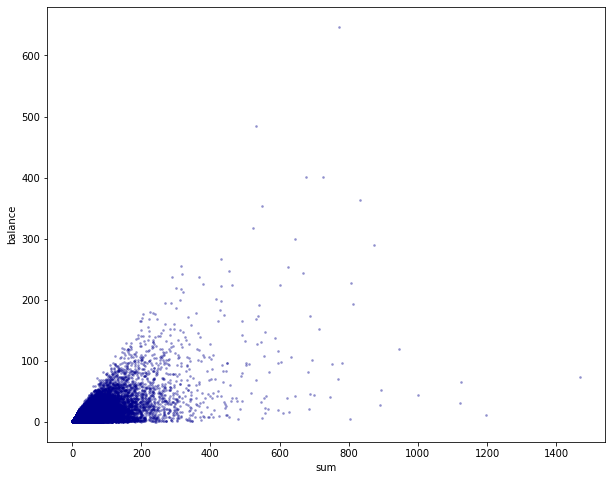

In [23]:
import matplotlib.pyplot as plt
twin_df_bal.plot.scatter(figsize=(10, 8),x='sum', y='balance',c='DarkBlue',marker='o',s=3,alpha = 0.3)

## prep station info 

In [24]:
station_a=twin_df[['station_a','sum']].rename(columns={'station_a':'name'})
station_b=twin_df[['station_b','sum']].rename(columns={'station_b':'name'})
station_all=pd.concat([station_a,station_b]).drop(columns='sum').drop_duplicates()
station_all

,name
0,Soissons Landing
2,Pier 40 - Hudson River Park
4,Roosevelt Island Tramway
6,Motorgate
10,Picnic Point
...,...
261580,Grove St PATH
292946,W 24 St & 7 Ave
284450,Marshall St & 2 St
235232,McGinley Square


In [25]:
df_start=df[['start_station_name','start_lat','start_lng']].rename(
    columns={'start_station_name':'name','start_lat':'lat','start_lng':'lng'}).drop_duplicates(subset=['name'], 
                                                                             keep='last').reset_index(drop = True)
df_end=df[['end_station_name','end_lat','end_lng']].rename(
    columns={'end_station_name':'name','end_lat':'lat','end_lng':'lng'}).drop_duplicates(subset=['name'], 
                                                                             keep='last').reset_index(drop = True)
df_station=pd.concat([df_start,df_end]).drop_duplicates().drop_duplicates(subset=['name'], 
                                                                             keep='last').reset_index(drop = True)
df_station

,name,lat,lng
0,34 St & 48 Ave,40.740821,-73.931472
1,E 138 St & Canal St W,40.812304,-73.929153
2,36 St & 47 Ave,40.742218,-73.929352
3,Nassau St\t& Duffield St,40.698477,-73.983840
4,Boerum Pl\t& Pacific St,40.688489,-73.991160
...,...,...,...
1602,Sands St Gate,40.699569,-73.979827
1603,10 Ave & W 14 St,40.741982,-74.008316
1604,Avenue D & E 10 St,40.725066,-73.975158
1605,W 52 St & 11 Ave,40.767272,-73.993929


In [26]:
gdf_station=gpd.GeoDataFrame(
    df_station, geometry=gpd.points_from_xy(df_station.lng, df_station.lat), crs=4326).to_crs(2263)
gdf_station_clip = gpd.clip(gdf_station,nyc_boro).reset_index(drop=True)
gdf_station_clip

,name,lat,lng,geometry
0,E Tremont Ave & E 176 St,40.847798,-73.901883,POINT (1011395.643 248168.319)
1,Anthony Ave & E Tremont Ave,40.848793,-73.903178,POINT (1011036.960 248530.436)
2,E Burnside Ave & Ryer Ave,40.850535,-73.901318,POINT (1011550.836 249165.687)
3,Creston Ave & E 178 St,40.850885,-73.906469,POINT (1010125.652 249291.641)
4,E Tremont Ave & Jerome Ave,40.851747,-73.908964,POINT (1009435.076 249604.973)
...,...,...,...,...
1565,W 13 St & 7 Ave,40.737815,-73.999947,POINT (984264.796 208082.535)
1566,W 15 St & 6 Ave,40.738046,-73.996430,POINT (985239.441 208166.735)
1567,Greenwich Ave & 8 Ave,40.739017,-74.002638,POINT (983519.069 208520.408)
1568,Washington St & Gansevoort St,40.739323,-74.008119,POINT (982000.085 208632.019)


In [27]:
cb=gpd.read_file('../vector/Community Districts')
cb=cb[['boro_cd','geometry']].to_crs(2263)
cb

,boro_cd,geometry
0,206.0,"POLYGON ((1019707.979 246708.141, 1019688.550 ..."
1,404.0,"POLYGON ((1026508.290 208553.862, 1026368.569 ..."
2,304.0,"POLYGON ((1012965.523 187886.949, 1012949.003 ..."
3,205.0,"POLYGON ((1014295.119 253236.989, 1014284.683 ..."
4,207.0,"POLYGON ((1018768.756 256840.862, 1018491.628 ..."
...,...,...
66,209.0,"POLYGON ((1028581.416 243756.464, 1028614.895 ..."
67,111.0,"MULTIPOLYGON (((1006028.598 231058.796, 100608..."
68,201.0,"POLYGON ((1011570.155 238213.889, 1011485.105 ..."
69,203.0,"POLYGON ((1017255.596 244431.387, 1017249.730 ..."


In [28]:
gdf_station_cb=gdf_station_clip.sjoin(cb)
gdf_station_cb['boro_cd_str']=gdf_station_cb['boro_cd'].astype(str)
gdf_station_cb['boro']=gdf_station_cb['boro_cd_str'].str.slice(start=0,stop=1)
gdf_station_cb=gdf_station_cb.drop(columns=['index_right','boro_cd_str','lat','lng']).reset_index(drop=True)
station_cb=gdf_station_cb.drop(columns=['geometry'])
station_cb

,name,boro_cd,boro
0,E Tremont Ave & E 176 St,205.0,2
1,Anthony Ave & E Tremont Ave,205.0,2
2,E Burnside Ave & Ryer Ave,205.0,2
3,Creston Ave & E 178 St,205.0,2
4,E Tremont Ave & Jerome Ave,205.0,2
...,...,...,...
1565,4 Ave & Shore Road Dr,310.0,3
1566,3 Ave & Wakeman Pl,310.0,3
1567,67 St & Ridge Blvd,310.0,3
1568,Wakeman Pl & Ridge Blvd,310.0,3


In [29]:
df_twin_left=pd.merge(twin_df_bal, station_cb, left_on=  ['station_a'], right_on= ['name'], how = 'left')
df_twin_all=pd.merge(df_twin_left, station_cb, left_on=  ['station_b'], right_on= ['name'], how = 'left')
df_twin_all=df_twin_all.drop(columns=['name_x','name_y']).rename(
    columns={'boro_cd_x':'boro_cd_a','boro_x':'boro_a','boro_cd_y':'boro_cd_b','boro_y':'boro_b',})
df_twin_all['boro_mix']=df_twin_all['boro_a']+df_twin_all['boro_b']
df_twin_all

,station_a,station_b,a,b,sum,balance,boro_cd_a,boro_a,boro_cd_b,boro_b,boro_mix
0,Old Slip & South St,South St & Gouverneur Ln,710,63,773,647,101.0,1,101.0,1,11
1,8 Ave & W 33 St,W 35 St & 8 Ave,508,24,532,484,104.0,1,105.0,1,11
2,River Ter & Warren St,Vesey Pl & River Terrace,564,163,727,401,101.0,1,101.0,1,11
3,5 Ave & E 87 St,Central Park S & 6 Ave,137,538,675,401,164.0,1,164.0,1,11
4,1 Ave & E 62 St,1 Ave & E 68 St,598,235,833,363,108.0,1,108.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...
300038,E 11 St & 3 Ave,Riverside Dr & W 91 St,1,1,2,0,103.0,1,107.0,1,11
300039,Berry St & N 8 St,Vesey Pl & River Terrace,1,1,2,0,301.0,3,101.0,1,31
300040,E 103 St & Lexington Ave,Riverside Dr & W 91 St,1,1,2,0,111.0,1,107.0,1,11
300041,Bergen St & Vanderbilt Ave,Vesey Pl & River Terrace,1,1,2,0,308.0,3,101.0,1,31


In [30]:
# df_twin_all.to_csv('../output/twin_station_data.csv')

<AxesSubplot:xlabel='sum', ylabel='balance'>

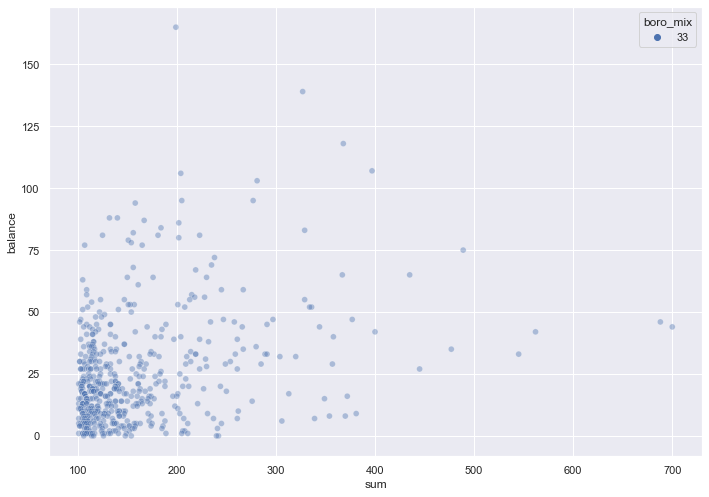

In [31]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_twin_all[(df_twin_all['sum']>100)&(df_twin_all['boro_mix']=='33')],
                x="sum", y="balance", hue="boro_mix",alpha=0.4)

<AxesSubplot:xlabel='sum', ylabel='balance'>

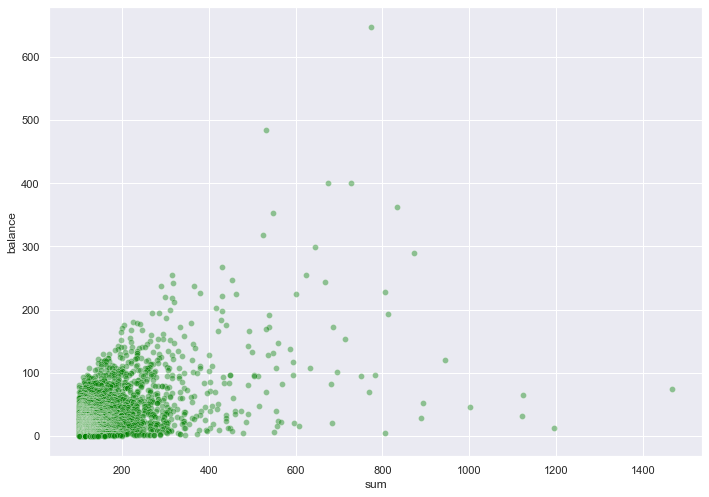

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_twin_all[(df_twin_all['sum']>100)&(df_twin_all['boro_mix']=='11')],
                x="sum", y="balance", color="green",alpha=0.4)

<AxesSubplot:xlabel='sum', ylabel='balance'>

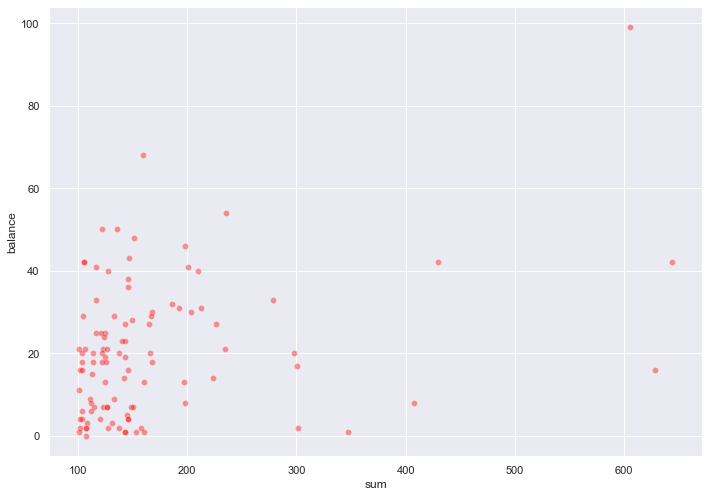

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_twin_all[(df_twin_all['sum']>100)&(df_twin_all['boro_mix']=='44')],
                x="sum", y="balance", color="red",alpha=0.4)

<AxesSubplot:xlabel='sum', ylabel='balance'>

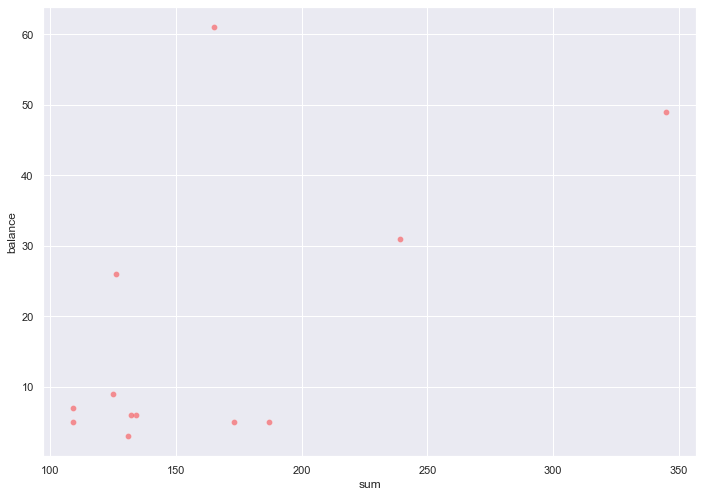

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_twin_all[(df_twin_all['sum']>100)&(df_twin_all['boro_mix']=='22')],
                x="sum", y="balance", color="red",alpha=0.4)

## The most connected station

In [35]:
df_groupby_start = df_groupby[['start_station_name','counts']].groupby(['start_station_name']).sum()
df_groupby_start = df_groupby_start.reset_index()
df_groupby_start = df_groupby_start.rename(columns={"start_station_name": "station"})


df_groupby_end = df_groupby[['end_station_name','counts']].groupby(['end_station_name']).sum()
df_groupby_end = df_groupby_end.reset_index()
df_groupby_end = df_groupby_end.rename(columns={"end_station_name": "station"})

df_groupby_start

,station,counts
0,1 Ave & E 110 St,2246
1,1 Ave & E 16 St,6760
2,1 Ave & E 18 St,7738
3,1 Ave & E 30 St,4597
4,1 Ave & E 39 St,6073
...,...,...
1560,Wyckoff Av & Stanhope St,1853
1561,Wyckoff Ave & Gates Ave,1684
1562,Wyckoff St & Nevins St,1256
1563,Wythe Ave & Metropolitan Ave,7470


In [36]:
df_groupby_all = df_groupby_start.merge(df_groupby_end, on='station',how='outer')
df_groupby_all = df_groupby_all.rename(columns={"counts_x": "start","counts_y": "end"})
df_groupby_all['start'] = df_groupby_all['start'].fillna(0)
df_groupby_all['end'] = df_groupby_all['end'].fillna(0)
df_groupby_all['sum'] = df_groupby_all['start']+df_groupby_all['end']
df_groupby_all

,station,start,end,sum
0,1 Ave & E 110 St,2246.0,2252,4498.0
1,1 Ave & E 16 St,6760.0,6751,13511.0
2,1 Ave & E 18 St,7738.0,7761,15499.0
3,1 Ave & E 30 St,4597.0,4575,9172.0
4,1 Ave & E 39 St,6073.0,6124,12197.0
...,...,...,...,...
1600,Pier 40 Dock Station,0.0,193,193.0
1601,Pier 40 X2,0.0,5,5.0
1602,W 24 St & 7 Ave,0.0,1,1.0
1603,Warren St,0.0,4,4.0


In [37]:
df_groupby_all_exist = existing.merge(df_groupby_all, left_on='name', right_on='station')
df_groupby_all_exist = df_groupby_all_exist.sort_values('sum', ascending=True)
df_groupby_all_exist.head(10)

,name,station,start,end,sum
1342,W 24 St & 7 Ave,W 24 St & 7 Ave,0.0,1,1.0
690,48 Ave & 37 St,48 Ave & 37 St,0.0,2,2.0
691,34 St & 48 Ave,34 St & 48 Ave,2.0,2,4.0
693,36 St & 47 Ave,36 St & 47 Ave,3.0,5,8.0
687,36 St & Hunters Point Ave,36 St & Hunters Point Ave,7.0,13,20.0
296,W 212 St & 10 Ave,W 212 St & 10 Ave,13.0,13,26.0
275,Sedgwick Ave & Hall of Fame Tce,Sedgwick Ave & Hall of Fame Tce,16.0,16,32.0
706,Skillman Ave & Honeywell St,Skillman Ave & Honeywell St,12.0,22,34.0
699,36 St & Queens Blvd,36 St & Queens Blvd,20.0,20,40.0
689,31 Pl & Hunters Point Ave,31 Pl & Hunters Point Ave,22.0,26,48.0


In [38]:
df_groupby_all_exist[df_groupby_all_exist['station']=='Flatbush Ave & Eastern Pkwy']

,name,station,start,end,sum
1054,Flatbush Ave & Eastern Pkwy,Flatbush Ave & Eastern Pkwy,621.0,625,1246.0


In [39]:
df[df['end_station_name']=='Sedgwick Ave & Hall of Fame Tce']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
13125,64D86F1D116A3353,classic_bike,2022-06-13 15:49:10,2022-06-13 16:05:26,9 Ave & W 206 St,8594.02,Sedgwick Ave & Hall of Fame Tce,8539.02,40.863089,-73.917583,40.859532,-73.913303,casual
102175,795EDCFF9020EA4C,classic_bike,2022-06-15 16:12:23,2022-06-15 16:28:29,9 Ave & W 206 St,8594.02,Sedgwick Ave & Hall of Fame Tce,8539.02,40.863089,-73.917583,40.859532,-73.913303,casual
263435,FB76BF2409C49194,electric_bike,2022-06-25 16:09:19,2022-06-25 16:18:09,Nelson Ave & W 172 St,8290.01,Sedgwick Ave & Hall of Fame Tce,8539.02,40.843965,-73.920999,40.859532,-73.913303,member
2209231,F4936F467B9A07DC,electric_bike,2022-06-10 17:31:47,2022-06-10 17:50:04,Goulden Ave & Bedford Park Blvd W,8738.01,Sedgwick Ave & Hall of Fame Tce,8539.02,40.873870,-73.895330,40.859532,-73.913303,member
2224850,DD474A34EB2FA3AC,classic_bike,2022-06-29 08:48:14,2022-06-29 09:39:45,Anthony Ave & E 175 St,8319.01,Sedgwick Ave & Hall of Fame Tce,8539.02,40.846465,-73.903869,40.859532,-73.913303,casual
2227230,722D733A35F4F825,electric_bike,2022-06-10 17:31:16,2022-06-10 17:49:53,Goulden Ave & Bedford Park Blvd W,8738.01,Sedgwick Ave & Hall of Fame Tce,8539.02,40.873870,-73.895330,40.859532,-73.913303,member
2228491,B0E85BAD223927D0,electric_bike,2022-06-05 19:11:46,2022-06-05 19:16:01,Creston Ave & E 181 St,8456.02,Sedgwick Ave & Hall of Fame Tce,8539.02,40.854900,-73.902810,40.859532,-73.913303,member
2240086,E9E4E01085B112C5,classic_bike,2022-06-26 06:17:42,2022-06-26 06:19:53,Sedgwick Ave & Hall of Fame Tce,8539.02,Sedgwick Ave & Hall of Fame Tce,8539.02,40.859532,-73.913303,40.859532,-73.913303,casual
2243320,86946D1C99ECDFE6,classic_bike,2022-06-05 09:31:38,2022-06-05 09:43:21,Nagle Ave & Ellwood St,8528.05,Sedgwick Ave & Hall of Fame Tce,8539.02,40.860149,-73.928511,40.859532,-73.913303,member
2243816,DA76860EDEFB2286,electric_bike,2022-06-07 18:28:39,2022-06-07 18:38:42,Amsterdam Ave & W 180 St,8353.02,Sedgwick Ave & Hall of Fame Tce,8539.02,40.847396,-73.931205,40.859532,-73.913303,member


In [40]:
df_07[df_07['end_station_name']=='Sedgwick Ave & Hall of Fame Tce']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
885189,BDD6B84729AFDB8E,electric_bike,2022-07-21 00:14:55,2022-07-21 00:59:50,E 161 St & Park Ave,7979.17,Sedgwick Ave & Hall of Fame Tce,8539.02,40.824811,-73.916407,40.859532,-73.913303,member
886923,B84D8D321C5064D5,classic_bike,2022-07-21 09:45:05,2022-07-21 09:48:31,W Tremont Ave & Matthewson Rd,8428.04,Sedgwick Ave & Hall of Fame Tce,8539.02,40.853748,-73.920879,40.859532,-73.913303,member
891069,0339A80B27221B4A,classic_bike,2022-07-20 18:09:52,2022-07-20 18:13:04,W Tremont Ave & Matthewson Rd,8428.04,Sedgwick Ave & Hall of Fame Tce,8539.02,40.853750,-73.920882,40.859532,-73.913303,member
891717,32552826FBBDA1C9,electric_bike,2022-07-20 09:20:26,2022-07-20 09:25:16,W Tremont Ave & Matthewson Rd,8428.04,Sedgwick Ave & Hall of Fame Tce,8539.02,40.853827,-73.920765,40.859532,-73.913303,member
892804,24034F0D8B731A7E,classic_bike,2022-07-10 04:25:38,2022-07-10 04:28:18,Loring Pl North & W 183 St,8555.05,Sedgwick Ave & Hall of Fame Tce,8539.02,40.860424,-73.909336,40.859532,-73.913303,member
892805,555018C8D401D90F,electric_bike,2022-07-04 17:31:27,2022-07-04 17:33:48,Loring Pl North & W 183 St,8555.05,Sedgwick Ave & Hall of Fame Tce,8539.02,40.860424,-73.909336,40.859532,-73.913303,member
894307,4895D127005F6245,classic_bike,2022-07-21 00:15:12,2022-07-21 01:01:14,E 161 St & Park Ave,7979.17,Sedgwick Ave & Hall of Fame Tce,8539.02,40.824849,-73.916457,40.859532,-73.913303,member
903717,466F983BFAC9FA86,classic_bike,2022-07-19 19:45:22,2022-07-19 20:39:40,Grand Ave & W Fordham Rd,8571.02,Sedgwick Ave & Hall of Fame Tce,8539.02,40.862962,-73.903154,40.859532,-73.913303,member
903802,6F7BD8B8C287FB7D,electric_bike,2022-07-22 09:20:53,2022-07-22 09:26:33,W Tremont Ave & Montgomery Ave,8407.03,Sedgwick Ave & Hall of Fame Tce,8539.02,40.851788,-73.916418,40.859532,-73.913303,member
907743,D8D531FE99696090,classic_bike,2022-07-31 10:44:55,2022-07-31 10:51:23,W Fordham Rd & Loring Pl N,8590.01,Sedgwick Ave & Hall of Fame Tce,8539.02,40.862950,-73.907410,40.859532,-73.913303,member


In [41]:
df_count_connect = df_groupby_start.merge(df_groupby_end, on='station',how='outer')
df_count_connect = df_count_connect.rename(columns={"counts_x": "start","counts_y": "end"})
df_count_connect

,station,start,end
0,1 Ave & E 110 St,2246.0,2252
1,1 Ave & E 16 St,6760.0,6751
2,1 Ave & E 18 St,7738.0,7761
3,1 Ave & E 30 St,4597.0,4575
4,1 Ave & E 39 St,6073.0,6124
...,...,...,...
1600,Pier 40 Dock Station,NaN,193
1601,Pier 40 X2,NaN,5
1602,W 24 St & 7 Ave,NaN,1
1603,Warren St,NaN,4


In [42]:
df_count_connect['start'] = df_count_connect['start'].fillna(0)
df_count_connect['end'] = df_count_connect['end'].fillna(0)
df_count_connect['sum'] = df_count_connect['start']+df_count_connect['end']
df_count_connect

,station,start,end,sum
0,1 Ave & E 110 St,2246.0,2252,4498.0
1,1 Ave & E 16 St,6760.0,6751,13511.0
2,1 Ave & E 18 St,7738.0,7761,15499.0
3,1 Ave & E 30 St,4597.0,4575,9172.0
4,1 Ave & E 39 St,6073.0,6124,12197.0
...,...,...,...,...
1600,Pier 40 Dock Station,0.0,193,193.0
1601,Pier 40 X2,0.0,5,5.0
1602,W 24 St & 7 Ave,0.0,1,1.0
1603,Warren St,0.0,4,4.0


In [43]:
df_count_connect.sort_values('sum', ascending=False)

,station,start,end,sum
1528,West St & Chambers St,15046.0,15526,30572.0
1403,W 21 St & 6 Ave,13830.0,13826,27656.0
1332,University Pl & E 14 St,13238.0,13205,26443.0
29,12 Ave & W 40 St,11801.0,12094,23895.0
245,6 Ave & W 33 St,11800.0,11409,23209.0
...,...,...,...,...
1575,Christ Hospital,0.0,1,1.0
1588,Hudson St & 4 St,0.0,1,1.0
1583,Grove St PATH,0.0,1,1.0
1602,W 24 St & 7 Ave,0.0,1,1.0


# Data Prep for flower pedel 
for data viz with D3

In [44]:
twin_df.head(10)

,station_a,station_b,a,b,sum,balance
0,Soissons Landing,Yankee Ferry Terminal,697,771,1468,74
2,Pier 40 - Hudson River Park,West St & Chambers St,604,592,1196,12
4,Roosevelt Island Tramway,Southpoint Park,595,530,1125,65
6,Motorgate,Roosevelt Island Tramway,545,576,1121,31
10,Picnic Point,Soissons Landing,478,523,1001,45
9,12 Ave & W 40 St,West St & Chambers St,532,412,944,120
14,10 Ave & W 14 St,West St & Chambers St,473,421,894,52
16,Picnic Point,Yankee Ferry Terminal,459,431,890,28
5,9 Ave & W 22 St,W 21 St & 6 Ave,292,582,874,290
3,1 Ave & E 62 St,1 Ave & E 68 St,598,235,833,363


In [45]:
twin_df=twin_df.reset_index(drop=True)
twin_df

,station_a,station_b,a,b,sum,balance
0,Soissons Landing,Yankee Ferry Terminal,697,771,1468,74
1,Pier 40 - Hudson River Park,West St & Chambers St,604,592,1196,12
2,Roosevelt Island Tramway,Southpoint Park,595,530,1125,65
3,Motorgate,Roosevelt Island Tramway,545,576,1121,31
4,Picnic Point,Soissons Landing,478,523,1001,45
...,...,...,...,...,...,...
300038,Ditmars Blvd & 79 St,E 51 St & 2 Ave,1,0,1,1
300039,Ditmars Blvd & 79 St,E 5 St & Ave A,1,0,1,1
300040,Ditmars Blvd & 79 St,Roosevelt Island Tramway,1,0,1,1
300041,Ditmars Blvd & 79 St,E 48 St & 5 Ave,1,0,1,1


In [46]:
twin_df['station_b'][0]

'Yankee Ferry Terminal'

In [47]:
station_b['sum_arrival_b']=0
for i,ele in enumerate(station_b['station_b']):
    station_b['sum_arrival_b'][i]= twin_df[twin_df['station_b']==station_b['station_b'][i]]['a'].sum()
station_b

KeyError: 'station_b'

In [ ]:
twin_df_ratio=twin_df.merge(station_b,left_on='station_b',right_on='station_b')
twin_df_ratio=twin_df_ratio.drop(columns={'sum','balance','index','b'})
twin_df_ratio

In [ ]:
twin_df_ratio['b_arrival_ratio']=twin_df_ratio['a']/twin_df_ratio['sum_arrival_b']
twin_df_ratio

In [ ]:
station_b =twin_df_ratio['station_b'].drop_duplicates().reset_index()
station_b

In [ ]:
twin_df_ratio_sel=twin_df_ratio[(twin_df_ratio['a']>10)&(twin_df_ratio['b_arrival_ratio']>0.02)]
twin_df_ratio_sel

In [ ]:
station_info_df_join=station_info_df[['name','lon','lat']]

In [ ]:
twin_df_ratio_sel_new=twin_df_ratio_sel.merge(station_info_df_join,left_on='station_b',right_on='name',how='left')
twin_df_ratio_sel_new

In [ ]:
station_info_df_join[station_info_df_join.isna()==True]

In [ ]:
twin_df_ratio_sel_new.to_csv('../data/twin_station_making_blossom_geo.csv')

In [ ]:
station_info_df_join.to_csv('../data/station_lookup.csv')

# count how many station connect to one station

In [ ]:
df_station = df[['start_station_name','end_station_name']].drop_duplicates()
df_station

In [ ]:
df_station_start = df_station.groupby(['start_station_name']).count()
df_station_end = df_station.groupby(['end_station_name']).count()
df_station_start = df_station_start.reset_index()
df_station_end = df_station_end.reset_index()
df_station_start = df_station_start.rename(columns={"start_station_name": "station","end_station_name":"counts"})
df_station_end = df_station_end.rename(columns={"end_station_name": "station","start_station_name":"counts"})

df_station_end

In [ ]:
df_station_connect = df_station_start.merge(df_station_end, on='station',how='outer')
df_station_connect = df_station_connect.rename(columns={"counts_x": "start","counts_y": "end"})
df_station_connect['start'] = df_station_connect['start'].fillna(0)
df_station_connect['end'] = df_station_connect['end'].fillna(0)
df_station_connect['sum'] = df_station_connect['start']+df_station_connect['end']
df_station_connect

In [ ]:
df_station_connect = df_station_connect.sort_values('sum', ascending=False)
df_station_connect.head(60)

In [ ]:
len(df_station_connect)

In [ ]:
#filter the station that only existing now
df_connect_exist = existing.merge(df_station_connect, left_on='name', right_on='station')
df_connect_exist = df_connect_exist.sort_values('sum', ascending=False)
df_connect_exist = df_connect_exist.reset_index(drop=True)
df_connect_exist.head(40)

In [ ]:
df_connected_top40 = df_station_connect.iloc[:40]
df_connected_top40 = df_connected_top40.sort_index()
df_connected_top40

In [ ]:
# df_connected_top40.to_csv('../output/df_connected_top40.csv')